### Student details

Student name: Tendai Chaka

Student ID: 20041829

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [13]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [14]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

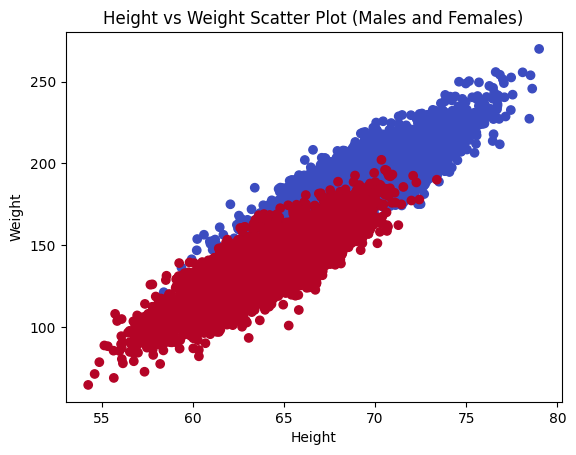

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('01_heights_weights_genders.csv', header=0)

X = data.iloc[:, 1:3].values  # X is the features in our dataset
y = data.iloc[:, 0].values

# Convert labels to integers: 1 for Female and -1 for Male
y = np.where(y == "Female", 1, -1)

# Create a scatter plot with different colors for males and females
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Add axis labels and a title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight Scatter Plot (Males and Females)')

plt.show()



### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [17]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [26]:
################################
ppn = Perceptron(epochs=50, eta=0.1)
ppn.train(X_train, y_train)
print('Weights: %s' % ppn.w_)

Weights: [  15.6         880.80617429 -341.46385195]


### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [27]:
################################
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)

0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

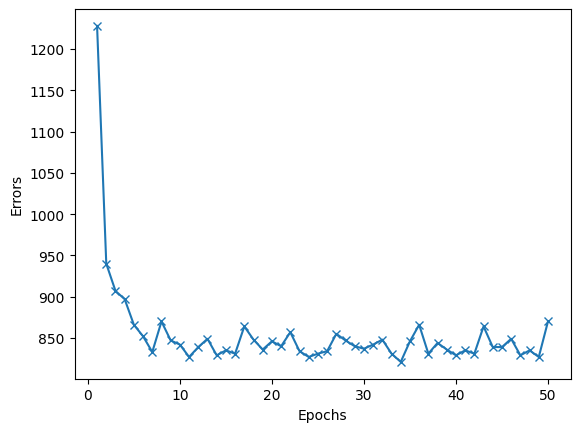

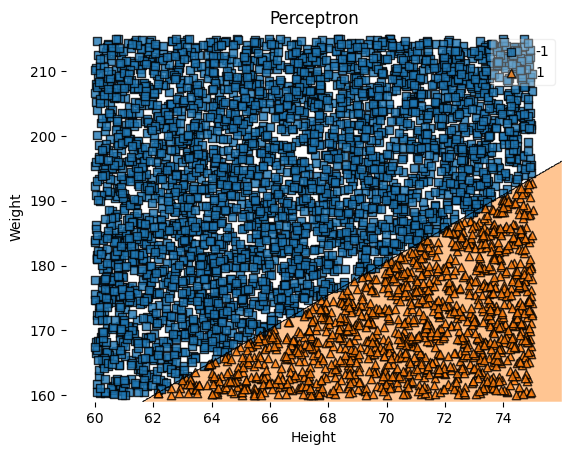

In [29]:
################################
from mlxtend.plotting import plot_decision_regions
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

#Using many random inputs (e.g. 5000), plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use Matplotlib
weight_range = (160, 215) 
height_range = (60, 75)

#Get random weights and heights in uniform distribution
weights = np.random.uniform(weight_range[0], weight_range[1], 5000)
heights = np.random.uniform(height_range[0], height_range[1], 5000)

x_samples = np.column_stack((heights, weights))
y_samples = ppn.predict(x_samples)
plot_decision_regions(x_samples, y_samples, clf=ppn)
plt.title('Perceptron')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
- The weights (self.w_ ) are first initialized to 0. To account for the bias term, this weight vector has an extra element (1 + the number of features in X). Then for each training sample xi, the output value is calculated and the weights are adjusted to reduce number of errors. This training procedure aims to decrease the amount of misclassifications by iteratively updating the weight vector. Until it accurately categorises every training example or reaches the predetermined number of training epochs, the algorithm keeps changing the weights. This type of technique, which is a basic perceptron or linear classifier, is frequently employed for binary classification applications.
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
- We do not reach the very best solution at the last epoch as they is still an error, other epochs eg 30 and 40 have a lower error. The perceptron never converges at any epoch to produce 0 errors. This can also be visualised on the decision boundary, there are some points that lie on the decision boundary line.
3.	Why can’t we get zero error with this data?
- Mathematically, Frank Rosenblatt demonstrated that the perceptron learning algorithm converges when the two classes can be properly separated by a linear classifier, but issues occur when this is not possible. Only data that can be linearly separated can be perfectly classified using perceptrons. Linear separability is the capacity to divide all the data points of one class from those of another class by a single, straight line or hyperplane. It's improbable given the dataset that a single straight line can precisely distinguish "Male" from "Female" based on height and weight. The two classes have a large amount of overlap, which prevents linear separation between them. Hence this will always lead to errors.


### PerceptronEE class

Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [30]:
import numpy as np

class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50, error_threshold=0.1):
        self.eta = eta
        self.epochs = epochs
        #error threshold
        self.error_threshold = error_threshold 

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            #exit if error falls below the threshold
            if errors < self.error_threshold:
                break

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
